# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [2]:
#Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies
#Bowl 1 contains 20 vanilla cookies and 20 chocolate cookies

#we would need to know what our prior probabilities were and our likelihoods

#prior probabilities
priors = [1/2, 1/2]

#prior likelihoods: The likelihoods - the percentages of vanilla in each bowl
likelihoods = [0.75, 0.5]

np.multiply(priors, likelihoods)

#Function will compute the marginal (marg) and then use Bayes' Theorem to calculate the posterior probabilities 
#for the each of the hypotheses (post):
def bayes_theorem(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    return np.divide(np.multiply(priors, likelihoods), marg)

bayes_theorem(priors, likelihoods)

#From these results, we can see that there is a 60% chance that the vanilla we drew came from Bowl 1
#a 40% chance that it came from Bowl 2

array([0.6, 0.4])

What is the probability that it came from Bowl 2?

In [3]:
#code above, 40%

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [4]:
#prior probabilities
priors = [1/2, 1/2]

#prior likelihoods: The likelihoods - the percentages of vanilla in each bowl
likelihoods = [0.25, 0.5]

#Function will compute the marginal (marg) and then use Bayes' Theorem to calculate the posterior probabilities 
#for the each of the hypotheses (post):
def bayes_theorem(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    return np.divide(np.multiply(priors, likelihoods), marg)

bayes_theorem(priors, likelihoods)

#From these results, we can see that there is a 33% chance that the chocolate we drew came from Bowl 1
#a 66% chance that it came from Bowl 2

array([0.33333333, 0.66666667])

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [5]:
#prior probabilities
priors = [1/2, 1/2]

#prior likelihoods
likelihoods = [0.04, 0.014] # multiply the probabilities of yellow from bag1 and bag2 AND green from bag1 and bag2
#yellow from bag1, green from bag2 = 0.2*0.2 = 0.04
#yellow from bag2, green from bag1 = 0.14*0.10 = 0.014

#Function will compute the marginal (marg) and then use Bayes' Theorem to calculate the posterior probabilities 
#for the each of the hypotheses (post):
def bayes_theorem(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    return np.divide(np.multiply(priors, likelihoods), marg)

bayes_theorem(priors, likelihoods)

#From these results, we can see that there is a 74% chance that the yellow is from bag1 (and green from bag2)

array([0.74074074, 0.25925926])

What is the probability that the yellow candy came from Bag 2?

In [6]:
#code above
#From these results, we can see that there is a 25.9% chance that the yellow is from bag2 (and green from bag1)

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [7]:
#the probabilitie that the green one came from Bag 1 (yellow from Bag 2) = 25.9%
#the probabilitie that the green one came from Bag 2 (yellow from Bag 1) = 74%

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [8]:
#prior probabilities
priors = [1/3, 1/3, 1/3]

#prior likelihoods
likelihoods = [0.5, 0, 1]

#Function will compute the marginal (marg) and then use Bayes' Theorem to calculate the posterior probabilities 
#for the each of the hypotheses (post):
def bayes_theorem(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    return np.divide(np.multiply(priors, likelihoods), marg)

bayes_theorem(priors, likelihoods)

#From these results, we can see that there is a 33.3% chance that the car is under door A and 
#66.6% chance that it's under door C
#it's better to switch the door

array([0.33333333, 0.        , 0.66666667])

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

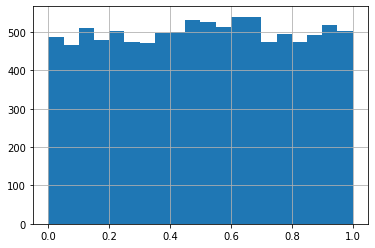

In [9]:
#Prior to seeing any traffic or purchase data, we have no idea what to expect 
#so we will start with the assumption that all percentages are equally likely.

n_draws = 10000
prior = pd.Series(stats.uniform(0,1).rvs(n_draws))
prior.hist(bins=20)

In [10]:
#We are going to record the number of sign ups in a variable called observed.

observed = 14

In [11]:
#We are going to create a generative model that will randomly draw from our prior uniform distribution, 
#simulate 100 people coming to our website a large number of time, 
#and see how many times we get a result that is in line with the result we have observed. 

#To do this in Python, we are going to define a generative_model function that accepts a random probability parameter 
#from our prior and then performs 100 binomial draws using that probability.

param = 14/100
param

0.14

In [12]:
def generative_model_np(param):
        return np.random.binomial(100, param)

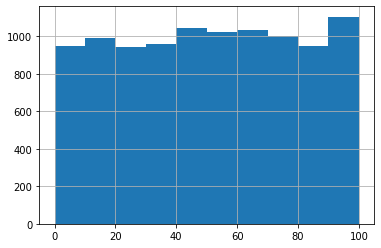

In [13]:
#We are going to create an empty list that is going to contain our simulated results (sim_data) 
#and then populate it by appending the results when each value in our prior distribution is plugged into our 
#generative model.

sim_data = prior.apply(lambda p: generative_model_np(p))
sim_data.hist()

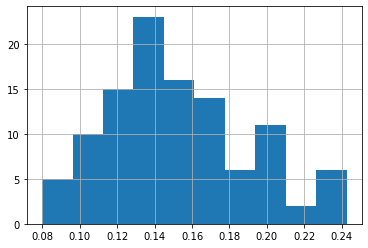

In [14]:
#Finally, we are going to arrive at our posterior distribution by selecting only the values from our prior distribution 
#that generated instances where the simulated result matched our observed result of 14 sign ups.

posterior = prior[sim_data  == observed]
posterior.hist()

In [15]:
#We can see just by looking at this that the updated probability of someone signing up is likely between 10% and 20% 
#and most likely somewhere between 12% and 15%.

Produce a set of descriptive statistics for the posterior distribution.

In [16]:
posterior.describe()

count    108.000000
mean       0.152162
std        0.037767
min        0.079986
25%        0.123686
50%        0.147245
75%        0.171943
max        0.242514
dtype: float64

What is the 90% credible interval range?

In [17]:
print(posterior.quantile(.025), '|', posterior.quantile(.975))

0.08840255442813387 | 0.23832884203077181


What is the Maximum Likelihood Estimate?

In [18]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.14 | 0.12962962962962962
